<a href="https://colab.research.google.com/github/varunpothu/Research_Methods_Assignment/blob/main/R_M__Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Individual Project - Large Language Models**
---
* **Name :** Varun Pothu
* **Student ID :** 21080409
* **Subject ID :** 7PAM2015-0509-2023
* **Subject :** Research Methods in Data Science
---

**Brief and Aim of the Assignment:**
---

In this assignment, I aim to develop a text classification model to analyze and predict the sentiment of DEI-related articles. The goal is to train a BERT-style language model to classify the sentiment of articles based on their content and DEI topic. By fine-tuning the model using this dataset, I seek to enhance its ability to understand and categorize sentiments expressed in various DEI contexts.



**Problem Statement:**


---


Understanding the sentiment of DEI-related articles is crucial for gaining insights into public attitudes and discourse on Diversity, Equity, and Inclusion. I am tasked with developing a robust machine learning model to accurately predict the sentiment of these articles based on their content and associated DEI topics. By fine-tuning a BERT model on this dataset, I aim to improve automated sentiment analysis within the DEI domain, which can assist organizations and researchers in addressing and responding to DEI issues more effectively.

**Dataset Summary:**
---
The dataset includes articles related to Diversity, Equity, and Inclusion (DEI), encompassing columns such as title, content, URL, sentiment label, and basis. The basis column categorizes the underlying DEI topic into four types:

1.   Gender
2.   Race
3.   Disability
4.   Other

The sentiment label reflects the sentiment expressed in each article (e.g., positive, negative, neutral).



```
Dataset Link: https://huggingface.co/datasets/deancgarcia/Diversity
```



### Importing Libraries

In [ ]:
pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
# Load the dataset using Hugging Face's datasets
diversity_df = pd.read_csv("hf://datasets/deancgarcia/Diversity/train.csv")


# Display the first few rows
print(diversity_df.head())


    ID                                              Title  \
0    1  Census data: US is diversifying, white populat...   
1    2  Workplace Diversity and Inclusion Gets Innovative   
2  404  Future immigration will change the face of Ame...   
3  410  Early Benchmarks Show ‘Post-Millennials’ on Tr...   
4  412  Millennials overtake Baby Boomers as America’s...   

                                             Content  Basis  \
0  No racial or ethnic group dominates for those ...      2   
1  wont be long before U. S. minorities are not i...      2   
2  A snapshot of the United States in 2065 would ...      2   
3  As a new generation of Americans begins to tak...      2   
4  Millennials have surpassed Baby Boomers as the...      2   

                                                 URL  Sentiment  Unnamed: 6  
0  https://apnews.com/article/race-and-ethnicity-...      False       156.0  
1  https://www.shrm.org/hr-today/news/hr-magazine...       True         NaN  
2  https://www.pewre

In [ ]:
diversity_df.head()

,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False,156.0
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True,NaN
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True,NaN
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True,NaN
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True,NaN


### Data Investigation

Descriptive Statistics

In [ ]:
# Display statistics for numerical columns
diversity_df.describe()

,ID,Basis,Unnamed: 6
count,482.000000,482.000000,1.0
mean,808.784232,2.510373,156.0
std,248.442874,0.738668,NaN
min,1.000000,1.000000,156.0
25%,584.250000,2.000000,156.0
50%,826.500000,3.000000,156.0
75%,1021.500000,3.000000,156.0
max,1299.000000,4.000000,156.0


In [ ]:
# Display value counts for categorical columns
diversity_df['Sentiment'].value_counts()

,count
Sentiment,
False,326
True,156


 Checking for Missing Values

In [ ]:
diversity_df.isnull().sum()

,0
ID,0
Title,0
Content,0
Basis,0
URL,0
Sentiment,0
Unnamed: 6,481


### Data Cleaning and Preprocessing

Handle Unwanted Data

In [ ]:
# Drop the 'Unnamed: 6' column
diversity_df_cleaned = diversity_df.drop(columns=['Unnamed: 6'])

# Display the updated DataFrame
diversity_df_cleaned.head()


,ID,Title,Content,Basis,URL,Sentiment
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True


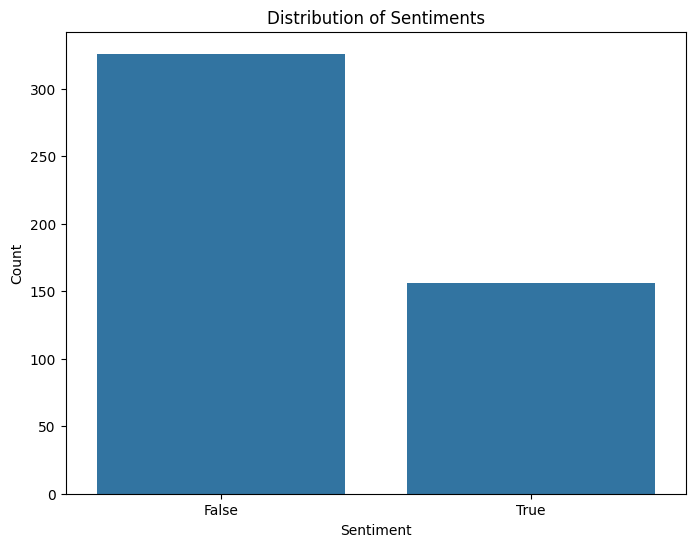

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=diversity_df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


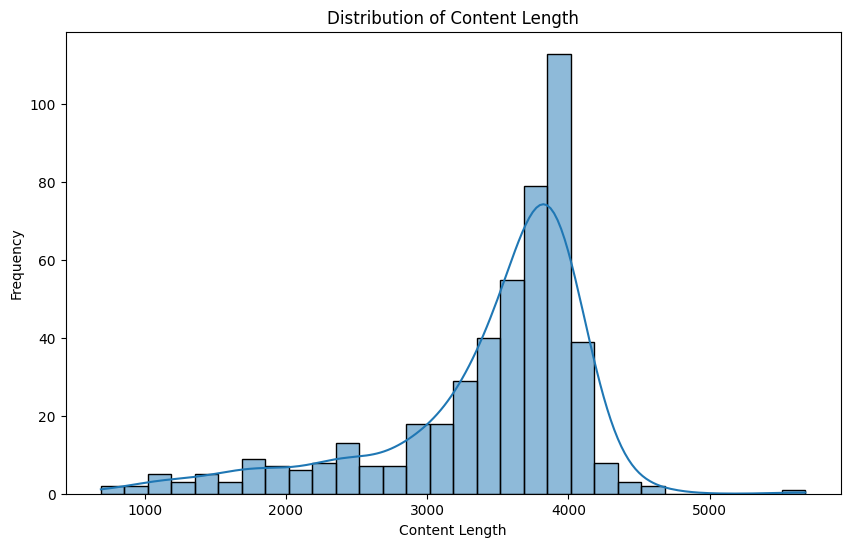

In [ ]:
# Calculate the length of each content entry
df_filled['Content_Length'] = df_filled['Content'].apply(len)

# Plot distribution of content length
plt.figure(figsize=(10, 6))
sns.histplot(df_filled['Content_Length'], bins=30, kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()


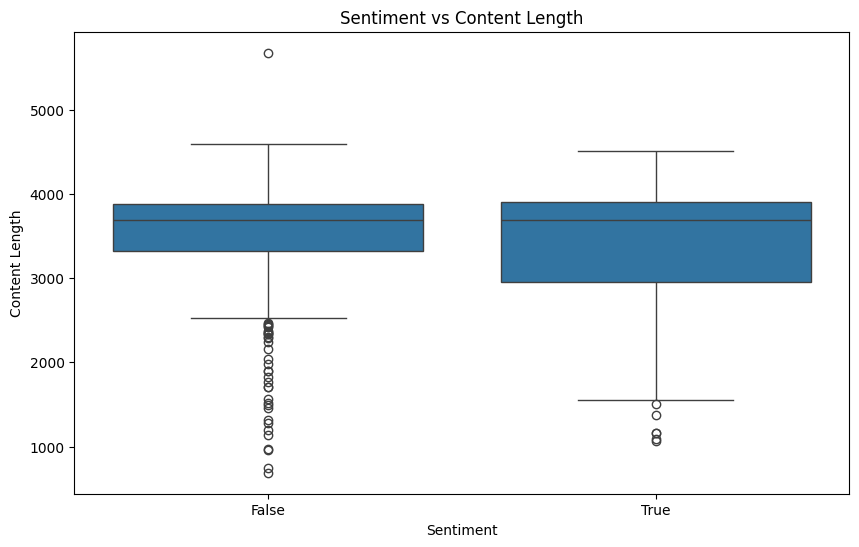

In [ ]:
# Plot sentiment vs. content length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Content_Length', data=df_filled)
plt.title('Sentiment vs Content Length')
plt.xlabel('Sentiment')
plt.ylabel('Content Length')
plt.show()


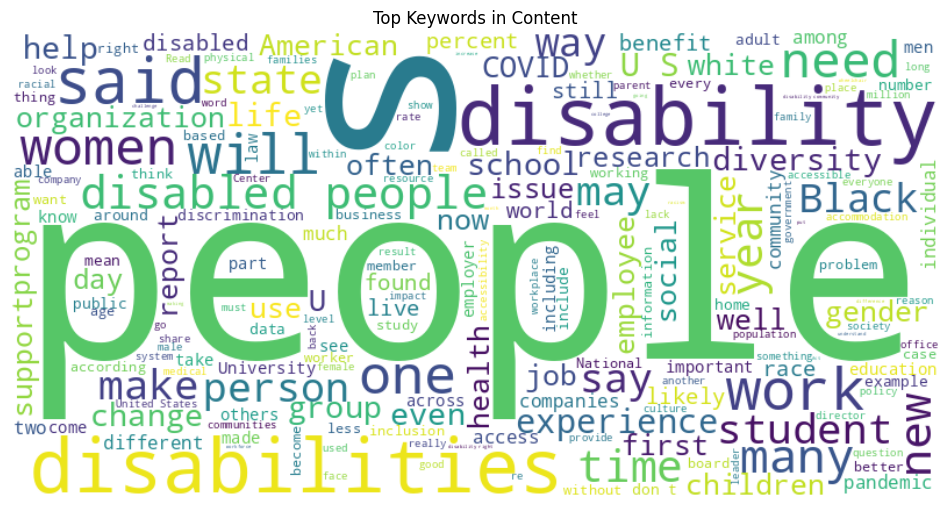

In [ ]:
from wordcloud import WordCloud

# Combine all the content into a single string
text = ' '.join(df_filled['Content'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Content')
plt.show()


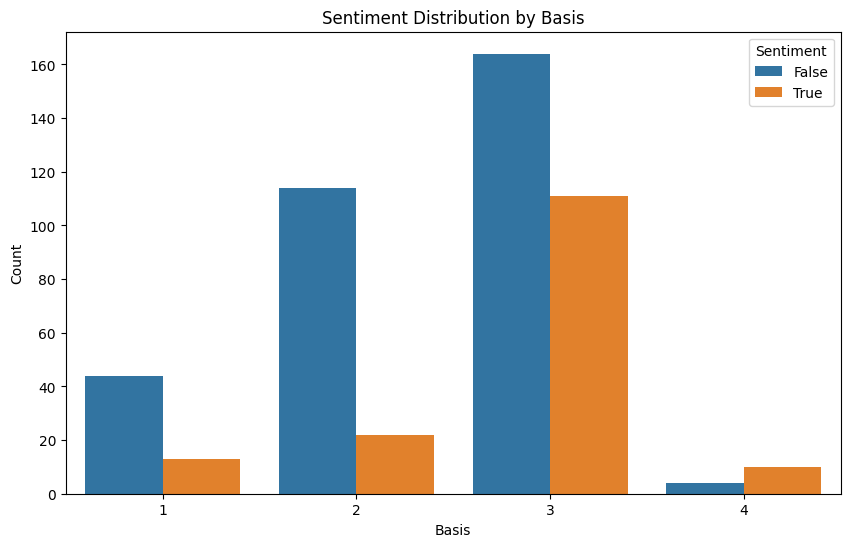

In [ ]:
# Plot sentiment distribution by basis (if 'Basis' is a meaningful categorical feature)
plt.figure(figsize=(10, 6))
sns.countplot(x='Basis', hue='Sentiment', data=df_filled)
plt.title('Sentiment Distribution by Basis')
plt.xlabel('Basis')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text data
def tokenize(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")

# Apply tokenization
tokenized_inputs = tokenize(diversity_df['Content'].tolist())


In [ ]:
# Create TensorFlow datasets
def create_tf_dataset(input_ids, attention_mask, labels, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices((
        {'input_ids': input_ids, 'attention_mask': attention_mask},
        labels
    ))
    dataset = dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

# Convert to TensorFlow dataset
train_dataset = create_tf_dataset(
    tokenized_inputs['input_ids'],
    tokenized_inputs['attention_mask'],
    diversity_df['Sentiment'].astype(int).values  # Ensure labels are in integer format
)


In [ ]:
# Load the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # Assuming binary classification

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=5
)


Epoch 1/5
61/61 [==============================] - 62s 1s/step - loss: 0.0099 - sparse_categorical_accuracy: 0.9979
Epoch 2/5
61/61 [==============================] - 62s 1s/step - loss: 0.0072 - sparse_categorical_accuracy: 0.9979
Epoch 3/5
61/61 [==============================] - 61s 1s/step - loss: 0.0093 - sparse_categorical_accuracy: 0.9979
Epoch 4/5
61/61 [==============================] - 62s 1s/step - loss: 0.0098 - sparse_categorical_accuracy: 0.9979
Epoch 5/5
61/61 [==============================] - 62s 1s/step - loss: 0.0083 - sparse_categorical_accuracy: 0.9979


In [ ]:
# Save the model
model.save_pretrained("./saved_model")

# Reload the model
model = TFBertForSequenceClassification.from_pretrained("./saved_model")


Some layers from the model checkpoint at ./saved_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./saved_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
# Prepare prediction function with clear output
def predict_with_explanation(texts):
    inputs = tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    predictions = model(input_ids, attention_mask=attention_mask)[0]
    predicted_labels = tf.argmax(predictions, axis=1).numpy()

    # Map the labels to human-readable sentiments
    label_map = {0: "Negative", 1: "Positive"}
    readable_predictions = [label_map[label] for label in predicted_labels]

    return readable_predictions

# Sample texts for prediction
sample_texts = [
    "This new policy aims to promote cultural diversity in the workplace.",
    "I am excited about the new technological advancements.",
    "New GP appointment rules in England are alarming and dangerous"
]

predictions = predict_with_explanation(sample_texts)
print("Predictions:", predictions)


Predictions: ['Positive', 'Positive', 'Negative']


In [ ]:
# Prepare prediction function with detailed explanations
def predict_with_detailed_explanation(texts):
    inputs = tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    predictions = model(input_ids, attention_mask=attention_mask)[0]
    predicted_labels = tf.argmax(predictions, axis=1).numpy()

    # Map the labels to detailed explanations
    label_map = {
        0: "Negative: The text indicates a negative sentiment or unfavorable opinion.",
        1: "Positive: The text indicates a positive sentiment or favorable opinion."
    }
    detailed_predictions = [label_map[label] for label in predicted_labels]

    return detailed_predictions

# Sample texts for prediction
sample_texts = [
    "This new policy aims to promote cultural diversity in the workplace.",
    "I am excited about the new technological advancements.",
    "New GP appointment rules in England are alarming and dangerous"
]

predictions = predict_with_detailed_explanation(sample_texts)
for text, prediction in zip(sample_texts, predictions):
    print(f"Text: {text}\nPrediction: {prediction}\n")


Text: This new policy aims to promote cultural diversity in the workplace.
Prediction: Positive: The text indicates a positive sentiment or favorable opinion.

Text: I am excited about the new technological advancements.
Prediction: Positive: The text indicates a positive sentiment or favorable opinion.

Text: New GP appointment rules in England are alarming and dangerous
Prediction: Negative: The text indicates a negative sentiment or unfavorable opinion.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    diversity_df['Content'].tolist(),
    diversity_df['Sentiment'].astype(int).values,
    test_size=0.2,
    random_state=42
)


In [ ]:
# Tokenize the text data
train_inputs = tokenize(train_texts)
val_inputs = tokenize(val_texts)

# Create TensorFlow datasets
train_dataset = create_tf_dataset(
    train_inputs['input_ids'],
    train_inputs['attention_mask'],
    train_labels
)

val_dataset = create_tf_dataset(
    val_inputs['input_ids'],
    val_inputs['attention_mask'],
    val_labels
)


In [ ]:
# Tokenize the text data
train_inputs = tokenize(train_texts)
val_inputs = tokenize(val_texts)

# Create TensorFlow datasets
train_dataset = create_tf_dataset(
    train_inputs['input_ids'],
    train_inputs['attention_mask'],
    train_labels
)

val_dataset = create_tf_dataset(
    val_inputs['input_ids'],
    val_inputs['attention_mask'],
    val_labels
)


In [ ]:
# Load the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
49/49 [==============================] - 111s 1s/step - loss: 0.6355 - sparse_categorical_accuracy: 0.6831 - val_loss: 0.6656 - val_sparse_categorical_accuracy: 0.6186
Epoch 2/5
49/49 [==============================] - 55s 1s/step - loss: 0.5826 - sparse_categorical_accuracy: 0.6987 - val_loss: 0.5935 - val_sparse_categorical_accuracy: 0.6186
Epoch 3/5
49/49 [==============================] - 53s 1s/step - loss: 0.4674 - sparse_categorical_accuracy: 0.7688 - val_loss: 0.5268 - val_sparse_categorical_accuracy: 0.7629
Epoch 4/5
49/49 [==============================] - 54s 1s/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8883 - val_loss: 0.5550 - val_sparse_categorical_accuracy: 0.8247
Epoch 5/5
49/49 [==============================] - 54s 1s/step - loss: 0.2317 - sparse_categorical_accuracy: 0.9091 - val_loss: 0.5560 - val_sparse_categorical_accuracy: 0.8247


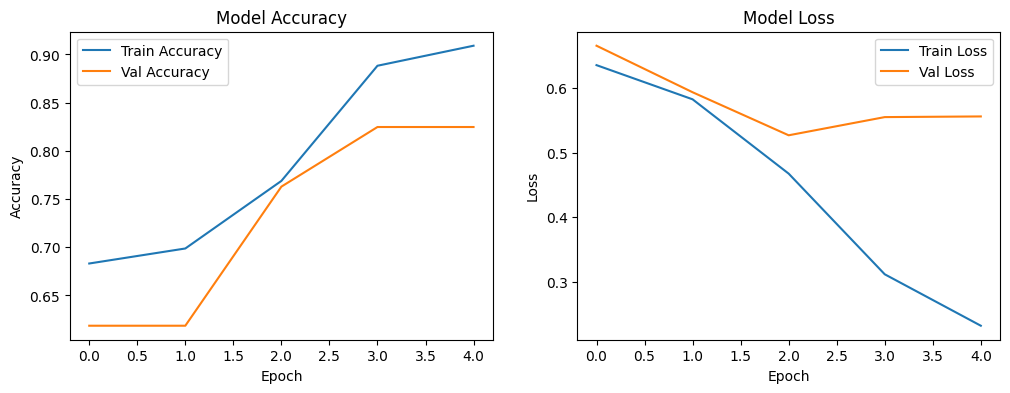

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy
ax1.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')

# Plot loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')

plt.show()


In [ ]:
# Evaluate the model
eval_results = model.evaluate(val_dataset)
print(f"Validation Loss: {eval_results[0]}")
print(f"Validation Accuracy: {eval_results[1]}")

# Additional evaluation metrics
from sklearn.metrics import classification_report

# Get predictions
val_predictions = model.predict(val_dataset)
predicted_labels = tf.argmax(val_predictions.logits, axis=1).numpy()

# Print classification report
print(classification_report(val_labels, predicted_labels, target_names=['Negative', 'Positive']))


13/13 [==============================] - 4s 325ms/step - loss: 0.5560 - sparse_categorical_accuracy: 0.8247
Validation Loss: 0.5560197830200195
Validation Accuracy: 0.8247422575950623
13/13 [==============================] - 9s 318ms/step
              precision    recall  f1-score   support

    Negative       0.61      0.70      0.65        60
    Positive       0.36      0.27      0.31        37

    accuracy                           0.54        97
   macro avg       0.48      0.49      0.48        97
weighted avg       0.51      0.54      0.52        97

